# Clustering

Francisco Aparecido Rodrigues, francisco@icmc.usp.br.<br>
Universidade de São Paulo, São Carlos, Brasil.<br>
Copyright (c) 2020.

Inicialmente, vamos gerar os dados usando funções específicas da biblioteca scikit-learn. Uma dessa funções é a make_blobs (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html).

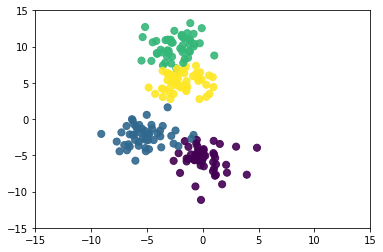

In [3]:
#importa as bibliotecas básicas
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

k = 4 # numero de clusters
n=200 #number de pontos
data = make_blobs(n_samples=n, n_features=2, centers=k, cluster_std=1.5, random_state=50)
X = data[0] # atributos das observacoes
labels = data[1] # classe conhecida inicialmente
# mostra os dados
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50, alpha=0.9)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.show(True)

As cores dos pontos acima representam os clusters originais.

## k-means

O método k-means é o mais popular em agrupamento de dados. Basicamente, precisamos definir o número de cluster. (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

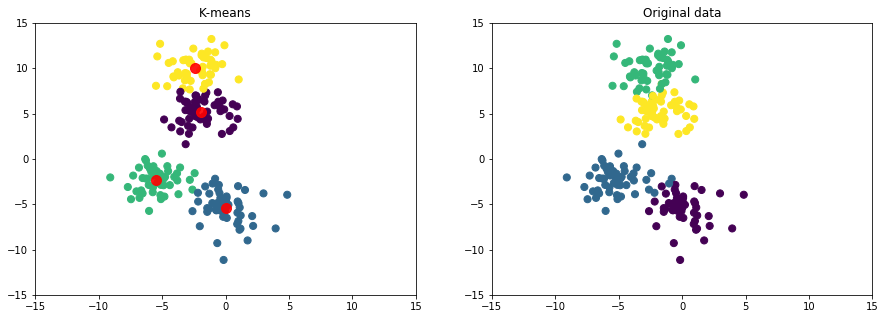

In [4]:
from sklearn.cluster import KMeans

k = 4 # numero de clusters a serem identificados
# define o método com k clusters
kmeans = KMeans(n_clusters=k) 
# realiza o ajuste considerando os dados X
kmeans.fit(X)
# faz a predição, identificando os clusters
y_km = kmeans.fit_predict(X)
# define o tamanha da figura
plt.figure(figsize=(15,5))
# mostra o primeiro gráfico
plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:,1], c=y_km, cmap='viridis', s=50)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.title('K-means')
centers = kmeans.cluster_centers_
# mostra os centróides obtidos
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.9); #show the cluster centers
# mostra o segundo gráfico
plt.subplot(1,2, 2)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.title('Original data')
plt.show(True)

Podemos estimar o número ideal de clusters usando o método do cotovelo (elbow method). Esse método é usado para encontrar o melhor valor de k. Podemos usar a distância média dos pontos dentro de um cluster até o seu centróide (within-cluster sum of squares, WCSS) para diferentes valores de k.
$$
WCSS=\sum_{i=1}^{N_c} \sum_{\text{x}\in C_i} d(\text{x},\bar{x}_{C_i})
$$
onde $C_i$ é um grupo e $N_c$ é o número de grupos.

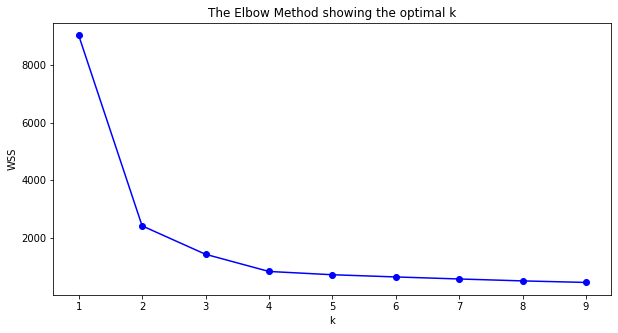

In [6]:
from scipy.spatial.distance import cdist

WCSS= []
K = range(1,10)
# considerando diversos valores de k
for k in K: 
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    # calcula a medida e armazena em uma lista 
    WCSS.append(kmeans.inertia_)

# mostra os resultados
plt.figure(figsize=(10,5))
plt.plot(K, WCSS, '-bo')
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Se assumirmos que há três clusters:

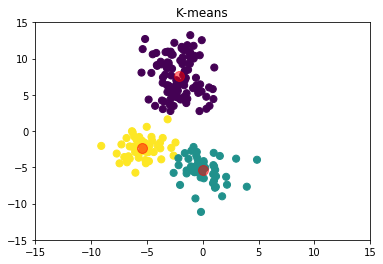

In [5]:
from sklearn.cluster import KMeans

# número de clusters
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
y_km = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y_km, cmap='viridis', s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5);
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.title('K-means')
plt.show(True)

No algortimo k-means, o agrupamento depende da posição inicial das sementes, conforme vemos abaixo. No entanto, a implementação do scikit-learn usa um método para otimizar a posição inicial das sementes (ver https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), de modo que o usuário não precisa se preocupar com esse detalhe. O centro de cada cluster é mostrado em vermelho nos gráficos abaixo.

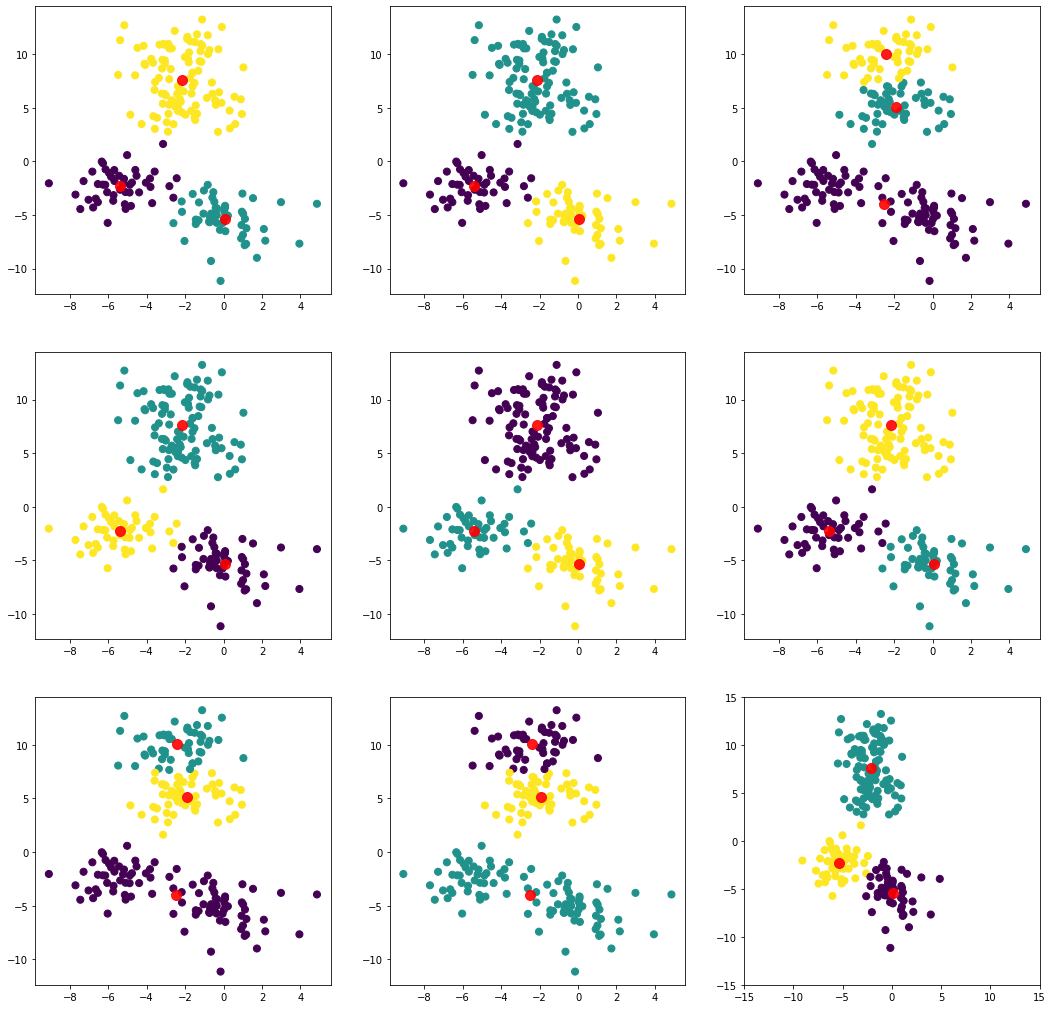

In [6]:
from sklearn.cluster import KMeans
k = 3 # número de clusters
plt.figure(figsize=(18,18))
# Mostra 9 execuções diferentes do algoritmo no mesmo conjunto de dados
for s in np.arange(1,10):
    kmeans = KMeans(n_clusters=k, init= 'random', n_init=1)
    kmeans.fit(X)
    y_km = kmeans.fit_predict(X)
    plt.subplot(3, 3, s)
    plt.scatter(X[:,0], X[:,1], c=y_km, cmap='viridis', s=50)
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.9);
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.show(True)

O algoritmo k-means não é adequado quando temos clusters globulares:

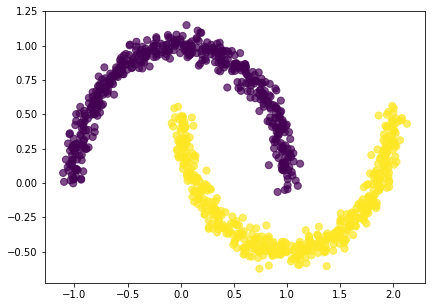

In [7]:
from sklearn import cluster, datasets
plt.figure(figsize=(15,5))

# número de observações
n_samples = 1000
# gera os dados
data  = datasets.make_moons(n_samples=n_samples, noise=.05)
X = data[0]
labels = data[1]
plt.subplot(1,2, 1)
plt.scatter(X[:,0], X[:,1], c=data[1], cmap='viridis', s=50, alpha=0.7)
plt.show(True)

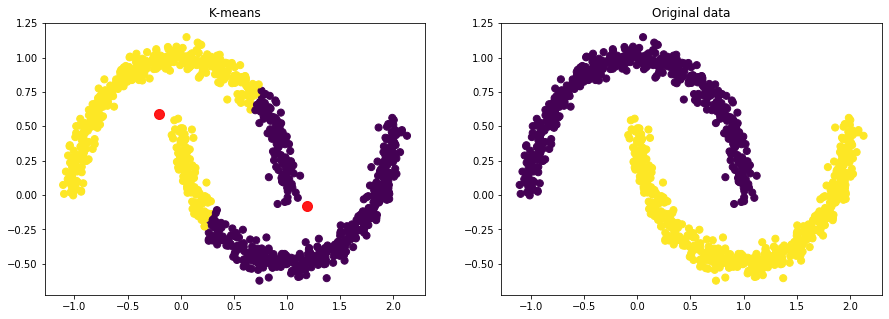

In [8]:
from sklearn.cluster import KMeans
plt.figure(figsize=(15,5))

k = 2 # número de clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
y_km = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_
# mostra o primeiro gráfico
plt.subplot(1,2, 1)
plt.scatter(X[:,0], X[:,1], c=y_km, cmap='viridis', s=50)
plt.title('K-means')
# mostra os centróides em vermelho
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.9);
# mostra o segundo gráfico
plt.subplot(1,2, 2)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50)
plt.title('Original data')
plt.show(True)

## Agrupamento hierárquico

Vamos analisar o agrupamento hierárquico, considerando diferentes métodos.

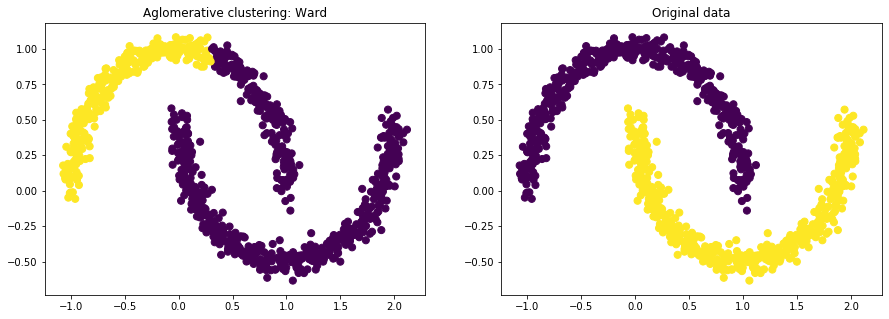

In [9]:
from sklearn import cluster, datasets

# número de observações
n_samples = 1000
data  = datasets.make_moons(n_samples=n_samples, noise=.05)
X = data[0]
labels = data[1]
k=2 # número de clusters
# aplica o método aglomerativo hierárquico
clustering = cluster.AgglomerativeClustering(n_clusters=k, linkage='ward')
y_hr = clustering.fit_predict(X)
plt.figure(figsize=(15,5))
# mostra a primeira figura
plt.subplot(1,2, 1)
plt.scatter(X[:,0], X[:,1], c=y_hr, cmap='viridis', s=50)
plt.title('Aglomerative clustering: Ward')
# mostra a segunda figura
plt.subplot(1,2, 2)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50)
plt.title('Original data')
plt.show(True)

Podemos usar diferentes métodos para agrupar os clusters. Dependendo do método, podemos obter resultados diferentes. Notem que mudamos o parâmetro 'linkage' na função 'AgglomerativeClustering'para definir o método usado.

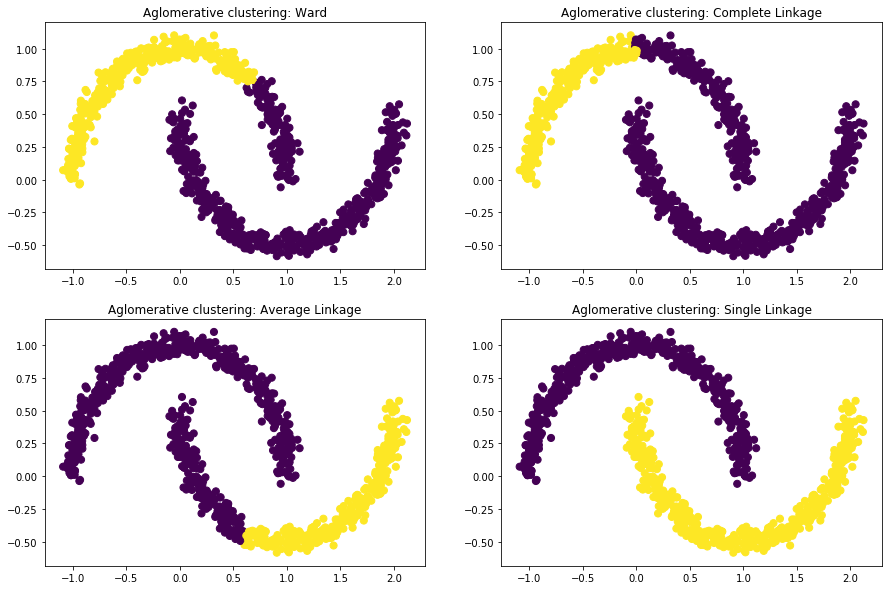

In [10]:
from sklearn import cluster, datasets

# número de observações
n_samples = 1000
data  = datasets.make_moons(n_samples=n_samples, noise=.05)
X = data[0]
k=2
plt.figure(figsize=(15,10))

clustering = cluster.AgglomerativeClustering(n_clusters=k, linkage='ward')
y_hr = clustering.fit_predict(X)
plt.subplot(2,2,1)
plt.scatter(X[:,0], X[:,1], c=y_hr, cmap='viridis', s=50)
plt.title('Aglomerative clustering: Ward')

clustering = cluster.AgglomerativeClustering(n_clusters=k, linkage='complete')
y_hr = clustering.fit_predict(X)
plt.subplot(2,2,2)
plt.scatter(X[:,0], X[:,1], c=y_hr, cmap='viridis', s=50)
plt.title('Aglomerative clustering: Complete Linkage')

clustering = cluster.AgglomerativeClustering(n_clusters=k, linkage='average')
y_hr = clustering.fit_predict(X)
plt.subplot(2,2,3)
plt.scatter(X[:,0], X[:,1], c=y_hr, cmap='viridis', s=50)
plt.title('Aglomerative clustering: Average Linkage')

clustering = cluster.AgglomerativeClustering(n_clusters=k, linkage='single')
y_hr = clustering.fit_predict(X)
plt.subplot(2,2,4)
plt.scatter(X[:,0], X[:,1], c=y_hr, cmap='viridis', s=50)
plt.title('Aglomerative clustering: Single Linkage')

plt.show(True)

Para a base gerada a partir da função make_blobs:

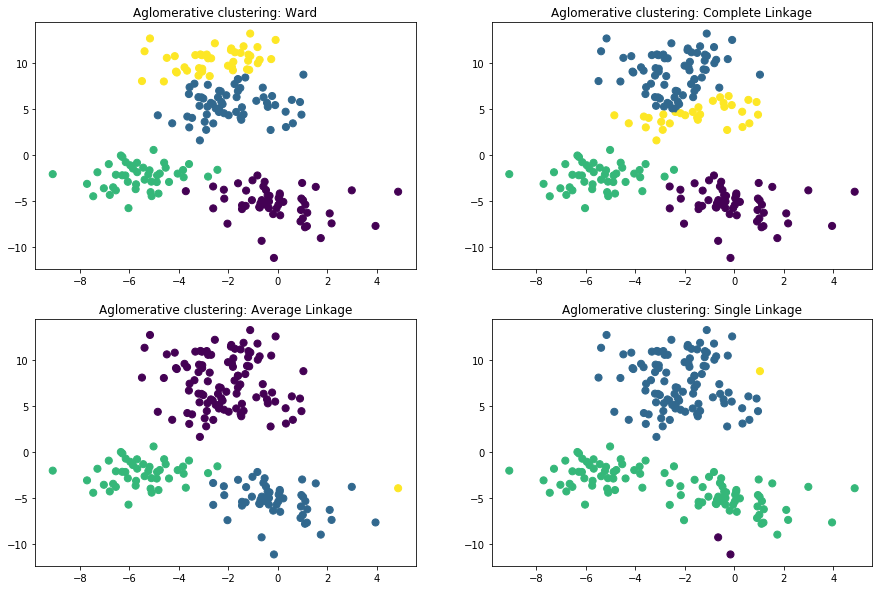

In [11]:
from sklearn import cluster, datasets

k = 4
n=200
data = make_blobs(n_samples=n, n_features=2, centers=k, cluster_std=1.5, random_state=50)
X = data[0]

plt.figure(figsize=(15,10))

clustering = cluster.AgglomerativeClustering(n_clusters=k, linkage='ward')
y_km = clustering.fit_predict(X)
plt.subplot(2,2,1)
plt.scatter(X[:,0], X[:,1], c=y_km, cmap='viridis', s=50)
plt.title('Aglomerative clustering: Ward')

clustering = cluster.AgglomerativeClustering(n_clusters=k, linkage='complete')
y_km = clustering.fit_predict(X)
plt.subplot(2,2,2)
plt.scatter(X[:,0], X[:,1], c=y_km, cmap='viridis', s=50)
plt.title('Aglomerative clustering: Complete Linkage')

clustering = cluster.AgglomerativeClustering(n_clusters=k, linkage='average')
y_km = clustering.fit_predict(X)
plt.subplot(2,2,3)
plt.scatter(X[:,0], X[:,1], c=y_km, cmap='viridis', s=50)
plt.title('Aglomerative clustering: Average Linkage')

clustering = cluster.AgglomerativeClustering(n_clusters=k, linkage='single')
y_km = clustering.fit_predict(X)
plt.subplot(2,2,4)
plt.scatter(X[:,0], X[:,1], c=y_km, cmap='viridis', s=50)
plt.title('Aglomerative clustering: Single Linkage')

plt.show(True)

É possível visualizar o dendograma dos dados. Para isso, usamos a biblioteca scipy.

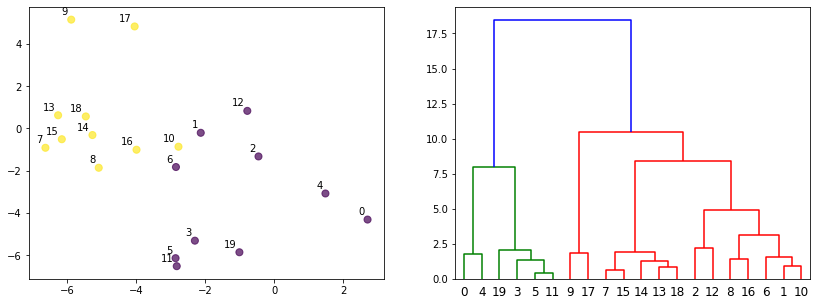

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(14,5))

n=20
data = make_blobs(n_samples=n, n_features=2, centers=2, cluster_std=2)
X = data[0]
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=data[1], s=50, alpha=0.7, label='True Position')

labels = range(0, n)  
for label, x, y in zip(labels, X[:, 0], X[:, 1]):  
    plt.annotate(label,xy=(x, y), xytext=(-3, 3),textcoords='offset points', ha='right', va='bottom')

plt.subplot(1,2,2)
Z = linkage(X, 'ward')
dendrogram(Z)  
plt.show(True)

## Avaliação dos agrupamentos

Para avaliarmos o quanto um método de agrupamento é preciso, podemos usar diferentes medidas, tais como silhoueta, pureza ou informação mútua.

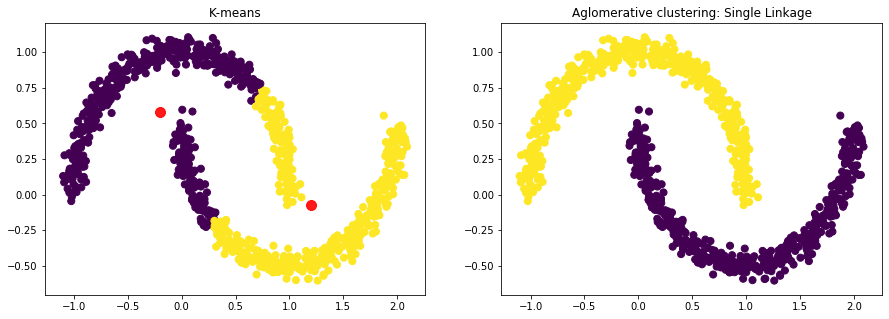

In [7]:
from sklearn import cluster, datasets
from sklearn.cluster import KMeans

n_samples = 1000

data  = datasets.make_moons(n_samples=n_samples, noise=.05)
X = data[0]

plt.figure(figsize=(15,5))

k = 2
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
y_km = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_
plt.subplot(1,2, 1)
plt.scatter(X[:,0], X[:,1], c=y_km, cmap='viridis', s=50)
plt.title('K-means')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.9);

clustering = cluster.AgglomerativeClustering(n_clusters=k, linkage='single')
y_hr = clustering.fit_predict(X)
plt.subplot(1,2, 2)
plt.scatter(X[:,0], X[:,1], c=y_hr, cmap='viridis', s=50)
plt.title('Aglomerative clustering: Single Linkage')
plt.show(True)

Valores das métricas para esse agrupamento:

In [8]:
from sklearn.metrics.cluster import adjusted_rand_score, mutual_info_score
from sklearn.metrics import silhouette_score

print('K-means:')
print('Adjusted rand score:', adjusted_rand_score(y_km, data[1]))
print('Mutual information score:', mutual_info_score(y_km, data[1]))
print('Silhouette score:', silhouette_score(X, y_km, metric='euclidean'))
print('\n')

print('Agrupamento hierárquico - single linkage:')
print('Adjusted rand score:', adjusted_rand_score(y_hr, data[1]))
print('Mutual information score:', mutual_info_score(y_hr, data[1]))
print('Silhouette score:', silhouette_score(X, y_hr, metric='euclidean'))

K-means:
Adjusted rand score: 0.25125450801100396
Mutual information score: 0.13191399108773616
Silhouette score: 0.48926365120473914


Agrupamento hierárquico - single linkage:
Adjusted rand score: 1.0
Mutual information score: 0.6931471805599454
Silhouette score: 0.33652745950454266


Para a outra base:

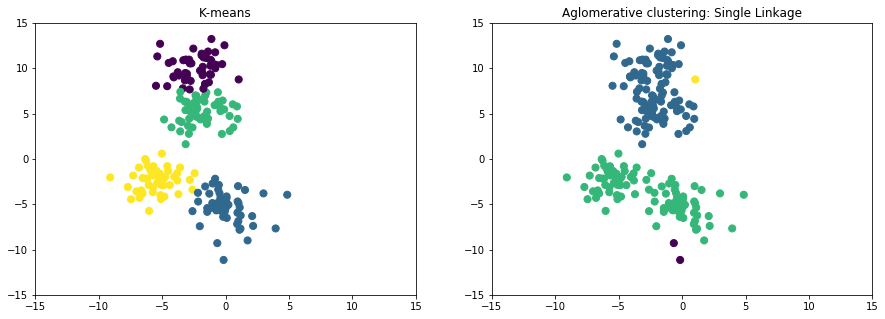

In [9]:
k = 4
n=200
data = make_blobs(n_samples=n, n_features=2, centers=k, cluster_std=1.5, random_state=50)
X = data[0]
labels = data[1]

plt.figure(figsize=(15,5))
k = 4
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
y_km = kmeans.fit_predict(X)
plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:,1], c=y_km, cmap='viridis', s=50)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.title('K-means')

clustering = cluster.AgglomerativeClustering(n_clusters=k, linkage='single')
y_hr = clustering.fit_predict(X)
plt.subplot(1,2, 2)
plt.scatter(X[:,0], X[:,1], c=y_hr, cmap='viridis', s=50)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.title('Aglomerative clustering: Single Linkage')
plt.show(True)

In [10]:
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import silhouette_score

print('K-means:')
print('Adjusted rand score:', adjusted_rand_score(y_km, data[1]))
print('Mutual information score:', normalized_mutual_info_score(y_km, data[1], average_method='arithmetic'))
print('Silhouette score:', silhouette_score(X, y_km, metric='euclidean'))
print('\n')

print('Agrupamento hierárquico - single linkage:')
print('Adjusted rand score:', adjusted_rand_score(y_hr, data[1]))
print('Mutual information score:', normalized_mutual_info_score(y_hr, data[1], average_method='arithmetic'))
print('Silhouette score:', silhouette_score(X, y_hr, metric='euclidean'))

K-means:
Adjusted rand score: 0.9081755877446034
Mutual information score: 0.8930448773510798
Silhouette score: 0.5455410206450777


Agrupamento hierárquico - single linkage:
Adjusted rand score: 0.47882114128303227
Mutual information score: 0.6298208806214954
Silhouette score: 0.19769463629724093


Notem que nesse último exemplo, o algoritmo k-means retornou um agrupamento melhor do que o agrupamento hierárquico.

Podemos usar essas métricas para encontrar o número ótimo de clusters. Se usarmos a medida de informação mútua:

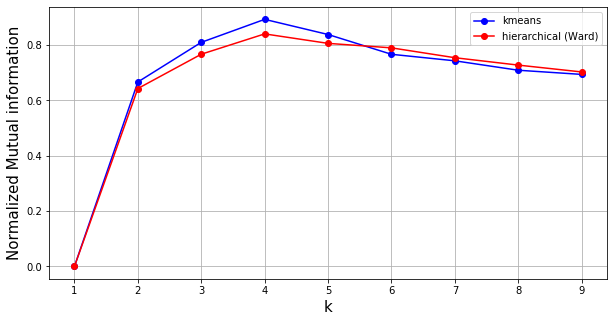

In [12]:
from scipy.spatial.distance import cdist

NMI_km = []
NMI_hr = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_km = kmeans.fit_predict(X)
    NMI_km.append(normalized_mutual_info_score(y_km, data[1], average_method='arithmetic'))
    clustering = cluster.AgglomerativeClustering(n_clusters=k, linkage='ward')
    y_hr = clustering.fit_predict(X)
    NMI_hr.append(normalized_mutual_info_score(y_hr, data[1], average_method='arithmetic'))
plt.figure(figsize=(10,5))
plt.plot(K, NMI_km, '-bo', label = 'kmeans')
plt.plot(K, NMI_hr, '-ro', label = 'hierarchical (Ward)')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Normalized Mutual information', fontsize = 15)
plt.grid(True)
plt.legend()
plt.show()

Pela figura, vemos que o número ideal de clusters é igual ao esperado, ou seja, k = 4.

## Exercícios de fixação

1 - Repita a análise acima para diferentes números de clusters, tal como k=2 e k=6. Varie a densidade de pontos.

2 - Repita a análise para dados gerados usando a função make_circles (https://scikit-learn.org/stable/datasets/index.html#sample-generators). Varie o número de observações e veja como se comporta o agrupamento.